**Introduction** 


This assignment contains 13 questions, totalling to 100 marks. Please write the answers to each question in the boxes following directly underneath each question (some of these are R Code boxes, and some of these R Markdown boxes, depending on the character of the questions). If you need to add text to a Code box, please use the commenting symbol (#) at the beginning of the line.


A few cells contain the information "DO NOT FILL IN THIS CELL". It is very important that you indeed do **not** write **anything** into those cells, as this could mess up the validation and marking of your notebook. 

You can make use of any existing R functions (including those in packages, as far as available), or R functions developed in the lectures and labs, **unless stated otherwise**.


We consider a data set known  as  the "Hidalgo  issue  of  Mexico".  This  dataset  contains  the  thickness  of  485 stamps that were printed in a mixture of paper types in Mexico between 1872  and 1874.  Please use the following code to read the data in and display a histogram: 


Loading required package: multimode



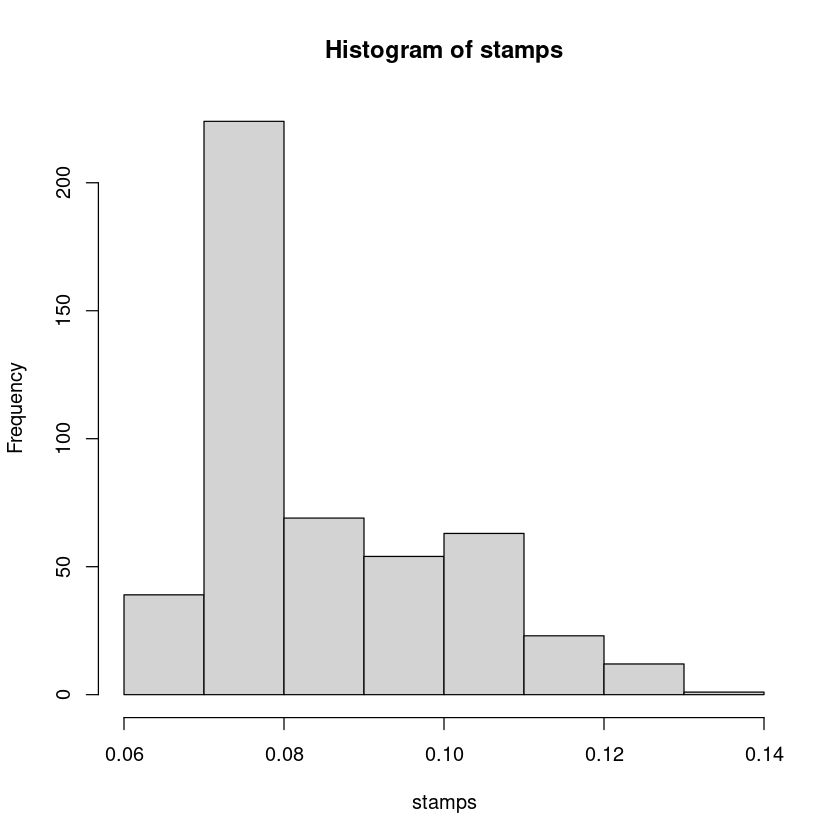

In [1]:
require(multimode)
data(stamps)
hist(stamps)

**Question 1** (4 marks)

Produce, side-by-side, two additional histograms of the same data, but with about twice and four times as many, respectively, bins as the original histogram. 


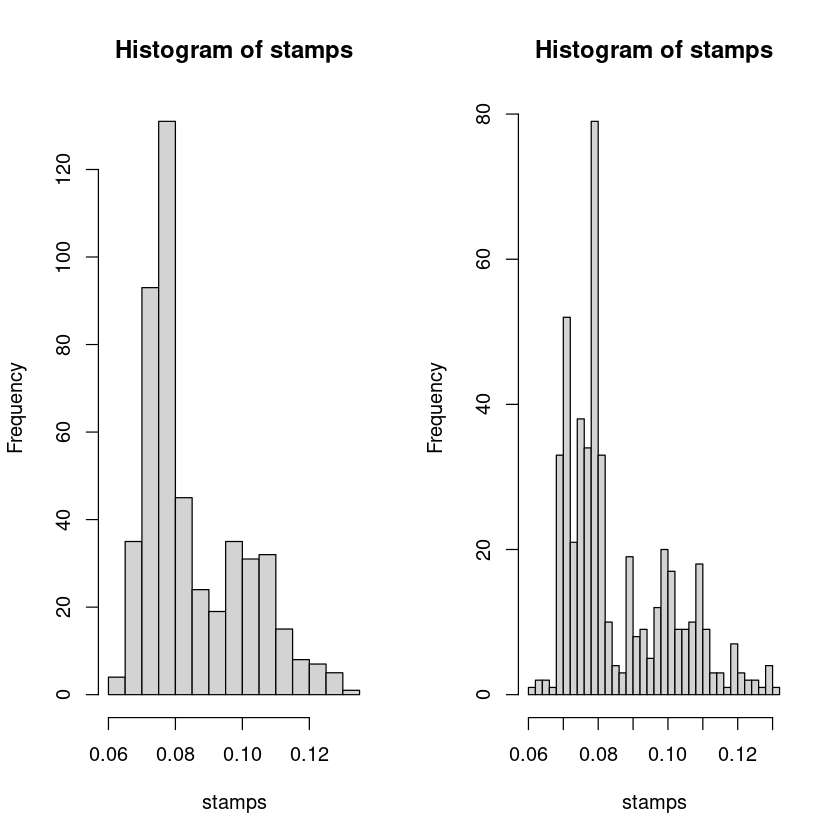

In [2]:
# YOUR CODE HERE
# From summary(hist(stamps)) we get that, the number of the breaks = 9 so the plots should be as the following:
par(mfrow=c(1,2))
hist(stamps,breaks = 18)
hist(stamps,breaks = 36)


**Question 2** (4 marks)

Produce and display a kernel density estimate of the stamps data set, using the R function `density` (with its default options).



Call:
	density.default(x = stamps)

Data: stamps (485 obs.);	Bandwidth 'bw' = 0.00391

       x                 y           
 Min.   :0.04827   Min.   : 0.00254  
 1st Qu.:0.07189   1st Qu.: 1.29110  
 Median :0.09550   Median : 7.96963  
 Mean   :0.09550   Mean   :10.57630  
 3rd Qu.:0.11911   3rd Qu.:13.20413  
 Max.   :0.14273   Max.   :40.74204  

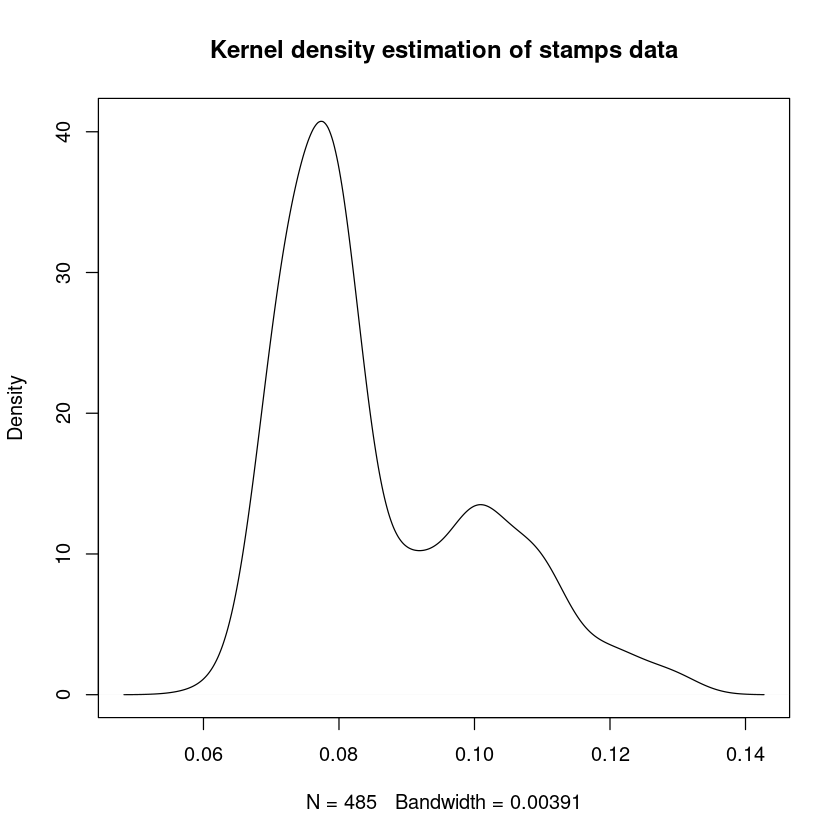

In [3]:
# YOUR CODE HERE
dd = density(stamps)
plot(dd, main = "Kernel density estimation of stamps data")
dd

**Question 3** (3 marks)

By considering the component `$bw` of the fitted density object, identify the bandwidth used for the estimation of the density above. 
Assign this bandwidth value to an object `h1`.

In [4]:
# YOUR CODE HERE
h1 = dd$bw
h1

[1] 0.003909682

In [5]:
# Do not fill in this cell

**Question 4** (12 marks)

We are now interested in estimating the density parametrically, through a Gaussian mixture. 
We allow the K mixture components to have different standard deviations. 
Using R function `normalmixEM` in R package `mixtools`, fit Gaussian mixture models to the stamps data with K=2,3, and 4 components, respectively. 
Report the following values for all K: mixture weights, mean parameters, and the estimated component standard deviations, as well as the resulting log-likelihoods.

It is recommended to set a seed to ensure reproducibility. Avoid reporting poor or non-convergent solutions.


In [19]:
# YOUR CODE HERE
library(mixtools)

set.seed(13)

k2 = normalmixEM(stamps, k = 2)
k3 = normalmixEM(stamps, k = 3)
k4 = normalmixEM(stamps, k = 4)

print("The summary of Gaussian mixture models when k = 2 is: (Hint: lambda = mixture weights)")
print("-------------------------------------------------")
summary(k2)
print("The summary of Gaussian mixture models when k = 3 is: (Hint: lambda = mixture weights)")
print("-------------------------------------------------")
summary(k3)
print("The summary of Gaussian mixture models when k = 4 is: (Hint: lambda = mixture weights)")
print("-------------------------------------------------")
summary(k4)

number of iterations= 45 
number of iterations= 742 
number of iterations= 184 
[1] "The summary of Gaussian mixture models when k = 2 is: (Hint: lambda = mixture weights)"
[1] "-------------------------------------------------"
summary of normalmixEM object:
           comp 1    comp 2
lambda 0.61058912 0.3894109
mu     0.07609074 0.1016010
sigma  0.00454197 0.0120056
loglik at estimate:  1484.75 
[1] "The summary of Gaussian mixture models when k = 3 is: (Hint: lambda = mixture weights)"
[1] "-------------------------------------------------"
summary of normalmixEM object:
           comp 1     comp 2    comp 3
lambda 0.63226311 0.02638086 0.3413560
mu     0.07619877 0.12497243 0.1012145
sigma  0.00464371 0.00422894 0.0093009
loglik at estimate:  1487.774 
[1] "The summary of Gaussian mixture models when k = 4 is: (Hint: lambda = mixture weights)"
[1] "-------------------------------------------------"
summary of normalmixEM object:
           comp 1     comp 2      comp 3    comp 4


**Question 5** (10 marks)

Visualize the three fitted mixture distributions (side-by-side in a 1 x 3 split window) 


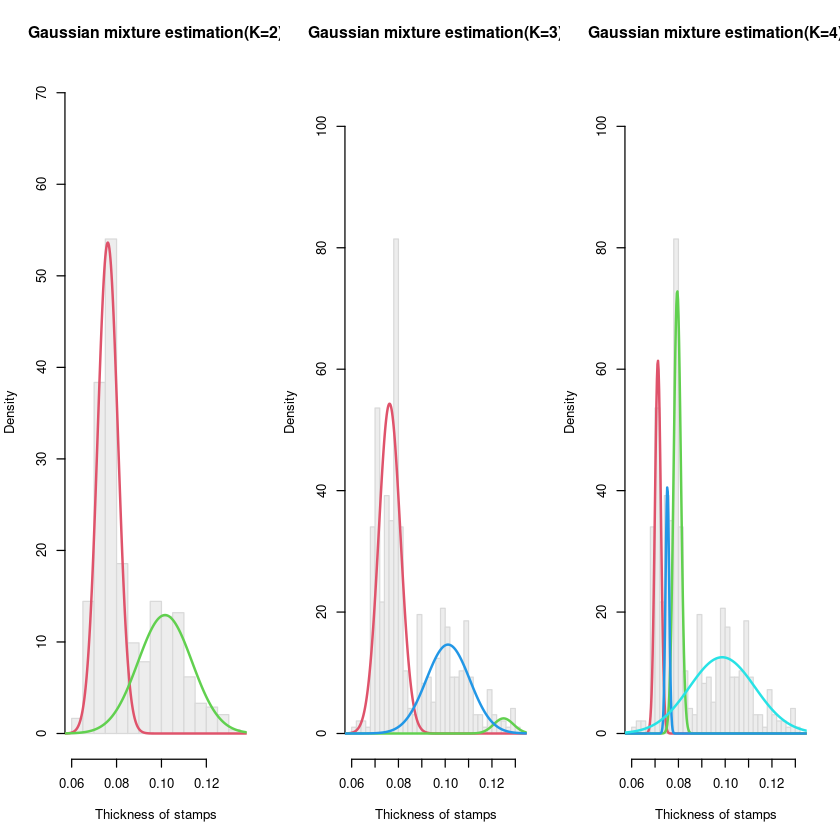

In [22]:
# YOUR CODE HERE

plot.mix<- function(dat, p, mu, sigma, breaks=25, dens=TRUE, ngrid=401, ...){
  try<-  hist(dat, breaks=breaks,  plot=FALSE)
  hist(dat, breaks=breaks, freq=FALSE, ylim=c(0, max(try$density)*1.3), col="grey93" , border="grey85",...)
  r <- diff(range(dat))
  grid<- seq(min(dat)-0.15*r, max(dat)+0.15*r, length=ngrid)
  K<- length(p)
  if (length(sigma)==1){
    sigma<-rep(sigma, K)
  }
  grid.mat<- matrix(0, ngrid,K)
  for (j in 1:K){
    grid.mat[,j]<- p[j]*dnorm(grid, mu[j], sigma[j])
  }
  for (j in 1:K){
    lines(grid, grid.mat[,j], col=j+1, lwd=2)
  }
  if (dens){
    lines(grid, apply(grid.mat,1, sum), col=1,lwd=2)
  }   
  invisible()  
}


par(mfrow=c(1,3))
plot.mix(stamps, k2$lambda, k2$mu, k2$sigma, main="Gaussian mixture estimation(K=2)", xlab="Thickness of stamps",breaks=25,  dens=FALSE) 
plot.mix(stamps, k3$lambda, k3$mu, k3$sigma, main="Gaussian mixture estimation(K=3)", xlab="Thickness of stamps",breaks=30,  dens=FALSE)
plot.mix(stamps, k4$lambda, k4$mu, k4$sigma, main="Gaussian mixture estimation(K=4)", xlab="Thickness of stamps",breaks=40,  dens=FALSE)



**Question 6** (15 marks)

For the stamps data, carry out an empirical likelihood ratio test of H_0: K=2 versus H_1: K=3. To do this, repeatedly simulate data from a two-Gaussian mixture distribution parametrised by the parameters you estimated in question 4 and compare the likelihood ratios obtained from simulations to those obtained from the `stamps` data. Use a random seed.

You will need for this, initially, a function which simulates data from a given mixture model. You can use for this purpose any functions that were developed in lectures or labs, or that you find within R.

You must manually implement the loop to repeatedly simulate data.

Provide a short conclusion summarizing your findings. In particular, identify any shortcomings of the analysis. You may get different answers with different random seeds.

In [8]:
# YOUR CODE HERE
gauss.mix.sim<-function(n, p, mu, sigma){          
   x  <- runif(n)
   sim <-rep(0,n)
   cp <-cumsum(p)
   for (i in 1:n){
       k <-1
       while (x[i]>cp[k]){
           k<-k+1
       }    
       sim[i] <- rnorm(1,mu[k],sigma[k])
   }
   return(sim)
 }


set.seed(13)
fit.mix2 <- normalmixEM(stamps, k=2)
fit.mix3 <- normalmixEM(stamps, k=3)
LRTS <- -2*k2$loglik + 2*k3$loglik
M <- 99
sim.LRTS <-rep(0,M)
n <- length(stamps)

for (m in 1:M){
 sim2 <- gauss.mix.sim(n, p=fit.mix2$lambda, mu=fit.mix2$mu, sigma=fit.mix2$sigma)
 fit.sim2<-  normalmixEM(sim2,k=2, verb=FALSE)
 fit.sim3<-  normalmixEM(sim2,k=3, verb=FALSE)
 sim.LRTS[m]<- -2*fit.sim2$loglik + 2*fit.sim3$loglik
}
sum(sim.LRTS > LRTS)/100


number of iterations= 45 
number of iterations= 742 
number of iterations= 46 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 38 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 38 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 68 
number of iterations= 404 
number of iterations= 91 
number of iterations= 409 
number of iterations= 32 
number of iterations= 822 
number of iterations= 53 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 35 
number of iterations= 624 
number of iterations= 56 
number of iterations= 214 
number of iterations= 44 
number of iterations= 650 
number of iterations= 41 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 53 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 32 
WARNING! NOT CONVERGENT! 
number of iterations= 1000 
number of iterations= 36 
WARNING! NOT CONVERGENT! 
number of iterati

[1] 0.17

#### Comments:
* As shown above, the model for K = 2 should be ok to represent our data. It satisfies the condition of 5% level of significance for P value; i.e. P value for H0: K=2 is 0.17 which is greater than 5%.  
* To get a better visiulaization of the the simulated null distribution, I will make the plots below:

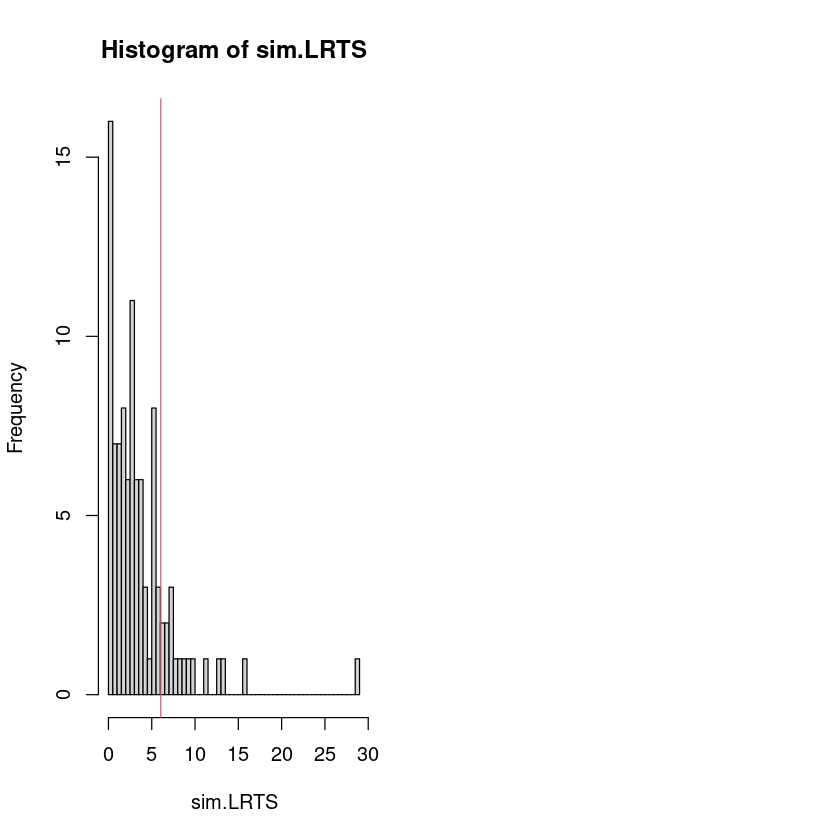

In [9]:
par(mfrow=c(1,2))
hist(sim.LRTS, right=FALSE, breaks=50)
abline(v=LRTS, col=2)

**Question 7** (15 marks)

Now carry out k-means clustering with 2, 3 and 4 components, respectively. 
Find the average silhouette width for  each of the three clusterings, and based on these, give your judgement on the adequate number of clusters for this data set.
Give a statement which compares this result with that from the fitted mixture model.

[1] "The average silhouette width for each of the three clusterings: 2, 3, and 4 respectively are:"
[1] 0.7184798 0.5685409 0.5762413


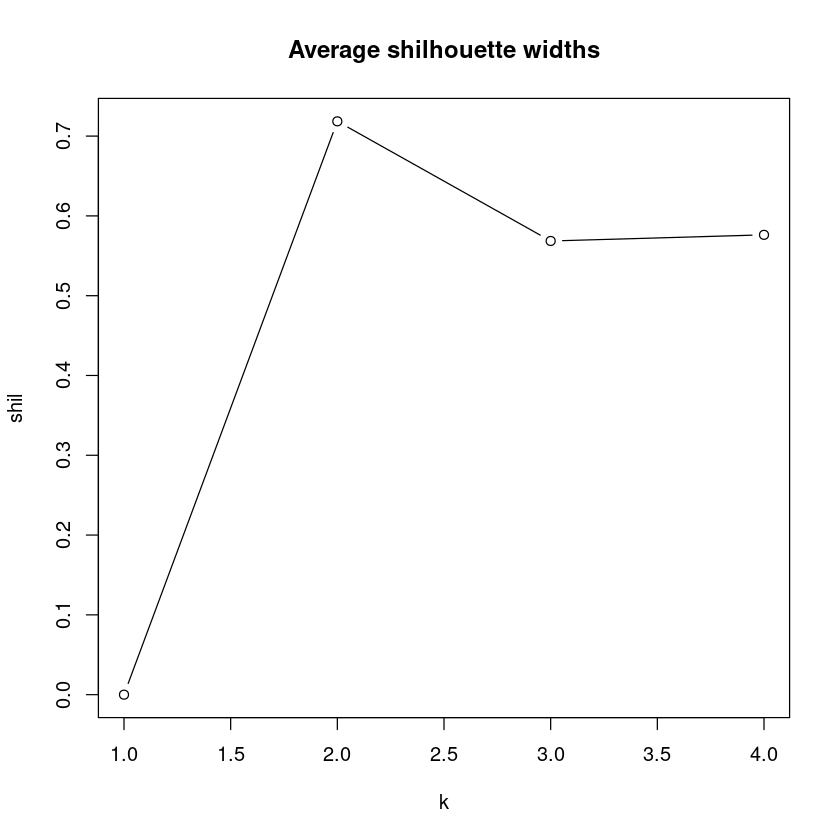

In [23]:
# YOUR CODE HERE
set.seed(13)
stamps.kmeans2 <- kmeans(stamps, centers=2)
stamps.kmeans3 <- kmeans(stamps, centers=3)
stamps.kmeans4 <- kmeans(stamps, centers=4)

library(cluster)
shil <- rep(0,4) 
for (k in 2:4){
shil[k]<- summary( silhouette(
kmeans(stamps,k)$cluster, dist(stamps))
  )$avg.width
}
plot(shil, type="b", main="Average shilhouette widths", xlab="k")
print("The average silhouette width for each of the three clusterings: 2, 3, and 4 respectively are:")
print(shil[2:4])


#### Comments
* As shown above the best number of clusters would be 2 becuase it's the closest to the value of 1
* Where the value of 1 represents that: the values in each cluster are very similar from each others and very different from values of other clusters. So 0.718 is the best value.

In a complete correspondence with fitted mixture model we get that:
* The best number of clusters to represent the data is two.
* We can move easily from two Guassian mixture model to the two clusters using MAP rule.  

**Question 8** (6 marks)

We return now to the problem of kernel density estimation. 

A popular rule for automatic bandwidth selection is Silverman's rule of thumb, which is given by

$$ h = 0.9 \times A n^{(-1/5)}$$

where $A= min(s, IQR/1.34)$, with $s$ being the sample standard deviation of the data, $IQR$ the interquartile range, and $n$ the sample size.

Produce a function with name `hsil` which implements this rule. Then apply it to the stamps data set, and save the resulting bandwidth to an object `h2`.


In [24]:
# YOUR CODE HERE
hsi <- function (data){
    n <- length (data)
    s <- sd(data)
    i = IQR(data)
    h = 0.9*min(s,i/1.34)*(n**(-1/5))
    return (h)
}
h2 = hsi(stamps)
h2

[1] 0.003909682

In [25]:
# Do not fill in this cell

**Question 9** (5 marks)

Another concept for bandwidth selection is that of a "critical bandwidth". 
The critical bandwidth h(k) is defined as the smallest bandwidth so that the estimated density has at most k modes.
Find this bandwidth for k=2, and save the outcome into an object `h3`. 

Hint: Use function `locmodes`. Ignore any warning messages referring to unbounded support of the density.

In [26]:
# YOUR CODE HERE
a = locmodes(stamps,mod0=2)
a
h3 = 0.003234863


Warning message in locmodes(stamps, mod0 = 2):
“If the density function has an unbounded support, artificial modes may have been created in the tails”



Estimated location
Modes: 0.07812975  0.1006472 
Antimode: 0.09309264 

Estimated value of the density
Modes: 43.27663  14.27105 
Antimode: 9.985282 

Critical bandwidth: 0.003234863


In [27]:
# Do not fill in this cell

**Question 10** (6 marks)

Draw, side by-side, two density plots using the bandwidths `h2` and `h3`, respectively.

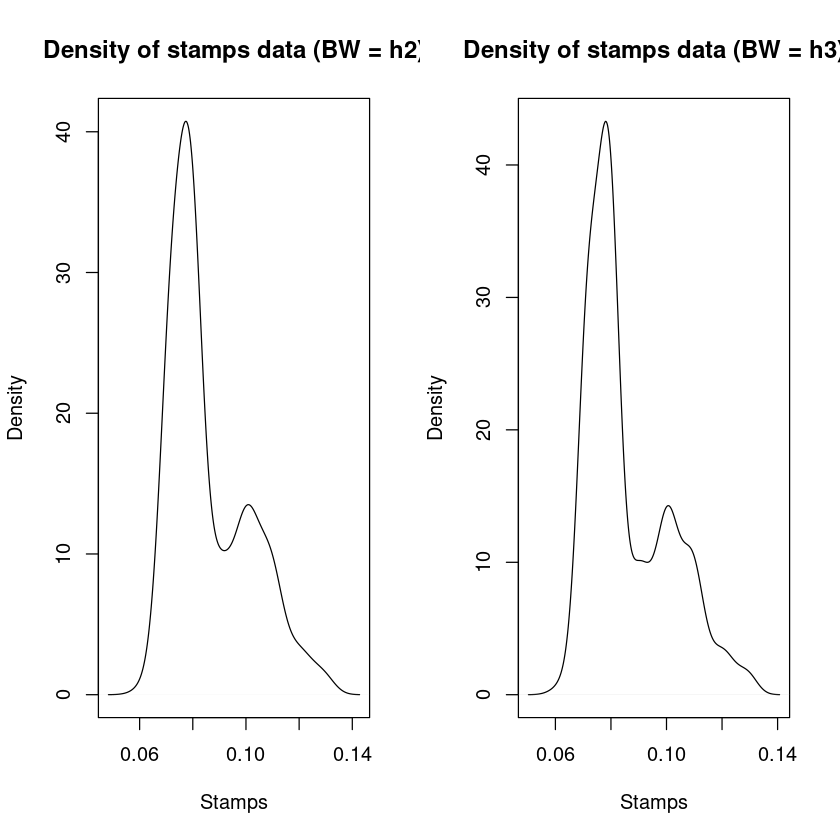

In [28]:
# YOUR CODE HERE
bwh2 = density(stamps, bw = h2)
bwh3 = density(stamps, bw = h3)
par(mfrow=c(1,2))
plot(bwh2,main = "Density of stamps data (BW = h2)", xlab = "Stamps")
plot(bwh3,main = "Density of stamps data (BW = h3)", xlab = "Stamps")


**Question 11** (10 marks)

Explain how density modes relate to clustering in the case of Gaussian kernels. Your answer should explain, conceptually, how cluster centres and clusters can be identified through density modes, and also give some insight into the computations required in order to achieve this. Do you deem the densities plotted in the previous cell useful for modal clustering? 


If we use Gaussian kernels to estimate probability density function from the data we will get that: 
* The probability density function will take normal shape of guassian .i.e. bell shape. 
* As a result we will get number of peaks which respresents the top of bells. These beaks called modes. 
* Basically, these modes represents points where we have large amount of data around. 
* If we manage to determine these points we will be able to determine the centers these clusters then assign the near values to this center. 
--------------------------------

In order to do this process we have mainly two methods: 

High density region:  
* It works by detecting modes by searching for maxima in the density function.
* Now to determine the clusters of data we add boundaries around these local modes and by considering level sets or by thresholding the density fuction we can assign each value to its suitable cluster. 
This method has two main disadvantages: 
* It is computationaly very demanding because what does it do actually is grid search which determines the grid point yielding the highest density after evaluating the density over a mesh of grid points. Especially if number of modes is greater than two. 
* Is not-so-easy to implement if one is interested in all local modes,not just global ones.

Mean shift algorthim: 
* It works by taking the gradient of the density estimate and signing the resulted equation to zero. 
* Solving of this question would lead us to the maximum points.
* Then we will apply this equation to each point and this will lead us (climb the hill) to the mode of this point which in the end will make clusters. 
* It is faster than High density region one.
* Sometimes this algorthim will consider an oulier as a new class. 
---------------------------------------------------------------------
If we look at the above the resulted densities:
* We can say that they are useful for modal clustering as we have a clear two modes in the left plot as well as in the right plot but with a probable third one that can be considered in one of the algorthims and not in others. 

**Question 12** (5 marks)

Using the `R` package `LPCM` apply a mean shift algorithm (function `ms`) to the `stamps` data and plot the results. 

                 Length Class  Mode   
cluster.center     3    -none- numeric
cluster.label    485    -none- numeric
closest.label    485    -none- numeric
h                  1    -none- numeric
data             485    -none- numeric
scaled             1    -none- numeric
scaled.by          1    -none- numeric
all.trajectories 485    -none- list   

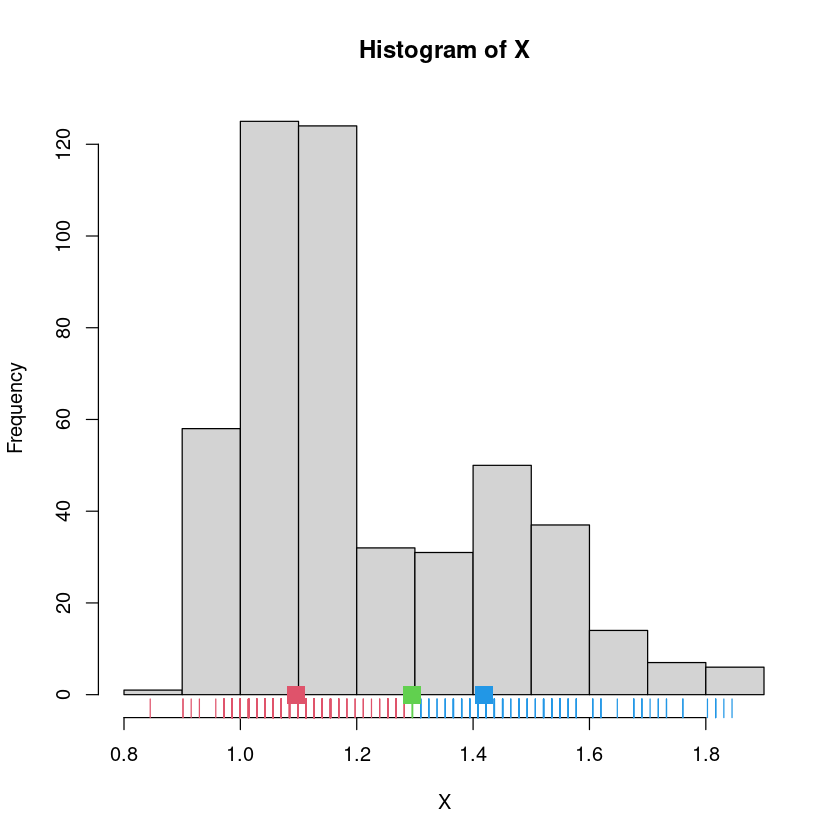

In [29]:
# YOUR CODE HERE
library(LPCM)
a=ms(stamps, plot = 1)
plot(a)
summary(a)

**Question 13** (5 marks)

How many cluster centres does the mean shift algorithm find? Is this consistent with the previous results?

It finds 3 clusters. And that is not consistent with the above results.
This returns mainly to: 
* As I mentioned before, mean shift algorithm considers an oulier as a new class. And that obvious in the above plot; we have only one value for the green cluster. 
